Copyright (C) 2020 Ralph "Blake" Vente and Anthony Chen

orpheus is free software: you can redistribute it and/or modify it under the
terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or (at your option) any later
version.

This program queries the filesystems's logs and produces charts based on the
experiments in those logs.

This one in particular reads content for our "previously seen" experiment.

In [20]:
import sys
sys.path.append('.')
from pathlib import Path
import numpy as np
import pandas as pd
import incense
from incense.experiment_loader import FileSystemExperimentLoader

basedir = Path("../prev_seen_logs/")
loader = FileSystemExperimentLoader(basedir)
loader

FileSystemExperimentLoader("../prev_seen_logs")

In [5]:
exp = loader.find_by_id(1)
print(dir(exp))
exp.config
#float(exp.metrics['test.accuracy'])


pmap({'name': 'svc__min_df_0.003_review_contents', 'dataset': pmap({'min_doc_freq': 0.003, 'test_set_prop': 0.1, 'feature_column': 'review_contents', 'filename': './data/100A50D__doc+pos.pkl', 'name': '100 author 50 docs each pos_tags'}), 'seed': 123096581, 'naivebayes': pmap({'alpha': 0.01, 'name': 'MultinomialNB'})})

In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [14]:
# Hack: only run this cell _after_ generating some other graph first.
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [7]:
def plot(dataframe, title="Title", xlabel="xlabel", ylabel="ylabel"):
    graph = dataframe.rename(columns={"review_contents": "review contents", "pos_tags": "POS tags L0", "path_pos_bigrams": "POS paths L1", "nested_pos_bigrams" : 'POS nested pairs', 'path_pos_trigrams': 'POS paths L2'}).plot(title=title)
    graph.set_xlabel(xlabel)
    graph.set_ylabel(ylabel)
    return graph.get_figure()


In [26]:
start = 1
end = 46
df = pd.DataFrame()
for i in range(start,end):
    exp = loader.find_by_id(i)
    cfg = exp.config
    feat = cfg['dataset']['feature_column']
    alpha = cfg['dataset']['test_set_prop']
    df.loc[alpha, feat] = exp.result.value

df.to_pickle('../results/svm_x_prev_seen.pkl')
df

,review_contents,pos_tags,nested_pos_bigrams,path_pos_bigrams,path_pos_trigrams
0.1,0.898000,0.720000,0.770000,0.782000,0.698000
0.2,0.880000,0.757000,0.774000,0.784000,0.694000
0.3,0.866000,0.741333,0.752000,0.773333,0.674000
0.4,0.850000,0.715500,0.741500,0.758000,0.652500
0.5,0.824800,0.692400,0.713200,0.736000,0.628000
0.6,0.785667,0.651000,0.666667,0.692667,0.565000
0.7,0.730857,0.600571,0.606571,0.633714,0.493143
0.8,0.631250,0.508000,0.515750,0.537500,0.405250
0.9,0.435111,0.337111,0.347556,0.373111,0.259111


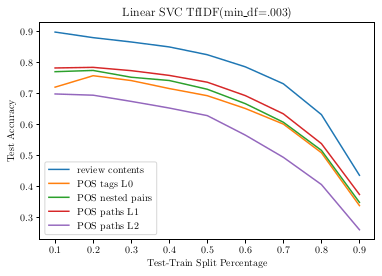

In [23]:
dataplot = plot(df, title="Linear SVC TfIDF(min\_df=.003)", xlabel="Test-Train Split Percentage", ylabel="Test Accuracy")


In [25]:
dataplot.savefig('../figures/svm_x_prev_seen.pdf')

In [34]:
# the next 45 experiments are for naive bayes
start = 46
end = 91
df2 = pd.DataFrame()
for i in range(start,end):
    exp = loader.find_by_id(i)
    cfg = exp.config
    feat = cfg['dataset']['feature_column']
    alpha = cfg['dataset']['test_set_prop']
    df2.loc[alpha, feat] = exp.result.value

df2.to_pickle('../results/svm_x_prev_seen.pkl')
df2

,review_contents,pos_tags,nested_pos_bigrams,path_pos_bigrams,path_pos_trigrams
0.1,0.782000,0.674000,0.616000,0.676000,0.552000
0.2,0.772000,0.669000,0.630000,0.680000,0.543000
0.3,0.764000,0.638667,0.589333,0.646667,0.472667
0.4,0.744000,0.613500,0.574500,0.619000,0.443000
0.5,0.722400,0.546000,0.519200,0.548400,0.358800
0.6,0.677333,0.414667,0.426333,0.431667,0.263000
0.7,0.618000,0.365429,0.363714,0.363143,0.233714
0.8,0.496500,0.195500,0.213500,0.195250,0.097750
0.9,0.330889,0.148000,0.163556,0.156444,0.096222


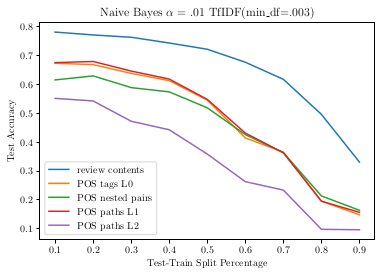

In [35]:
dataplot2 = plot(df2, title="Naive Bayes $\\alpha = .01$ TfIDF(min\_df=.003)", xlabel="Test-Train Split Percentage", ylabel="Test Accuracy")
dataplot2.savefig('../figures/nb_x_prev_seen.pdf')